In [2]:
import argparse
import numpy as np
from scipy import signal
import sounddevice as sd
import matplotlib.pyplot as plt
import wcslib as wcs

In [3]:
# TODO: Add your parameters here. You might need to add other parameters as well.
channel_id = 17
Tb = 0.02

dt = 1/22050
Ac = 1
fc = 4400
bs = 1 / Tb
wc = 27646    # rad/s
alpha = 2 * np.pi * 200
# Ar = |H(w)| * Ac
tr = 1
phi = -wc*tr

# Message to be transmitted
data = [0, 1, 0, 1, 1, 0, 0, 1, 1, 0]  # Example binary data

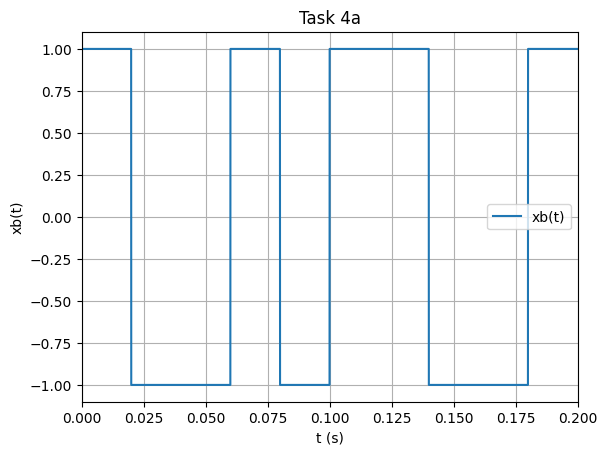

In [4]:
#### TASK 4A ####

# Encode baseband signal
xb = wcs.encode_baseband_signal(data, Tb)

# TODO: Put your transmitter code here (modulation, filtering, etc.)
t = np.arange(0, xb.shape[0]) * dt  
t1 = 10*Tb

# Ensure the signal is mono, then play through#  speakers

# xt = np.stack((xt, np.zeros(xt.shape)), axis=1)
# sd.play(xt, 1/dt,blocking=True)

fig, ax = plt.subplots()

#### TASK 4A #### #
plt.title("Task 4a")
ax.plot(t, xb, label="xb(t)")
ax.legend()
ax.set_xlabel("t (s)")
ax.set_ylabel("xb(t)")
ax.set_xlim(0, t1)
ax.grid()

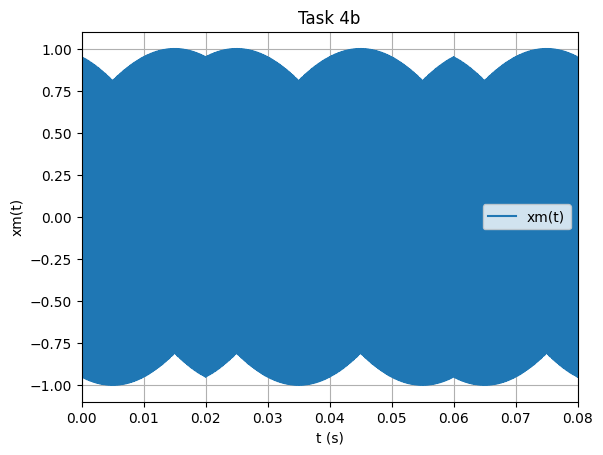

In [5]:
#### TASK 4B ####
xc = Ac * np.sin(wc * t)                             # Task 4b)
xm = xb * xc
xt = xm

fig, ax = plt.subplots()
plt.title("Task 4b")
ax.plot(t, xm, label="xm(t)")
ax.legend()
ax.set_xlabel("t (s)")
ax.set_ylabel("xm(t)")
ax.set_xlim(0, 4*Tb)
ax.grid()

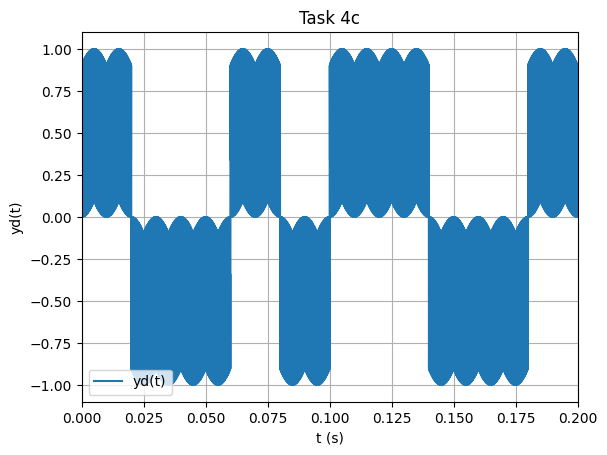

In [6]:
#### TASK 4C ####
yd = xm * np.sin(wc * t)

fig, ax = plt.subplots()
plt.title("Task 4c")
ax.plot(t, yd, label="yd(t)")
ax.legend()
ax.set_xlabel("t (s)")
ax.set_ylabel("yd(t)")
ax.set_xlim(0, t1) 
ax.grid()

Max magnitude (dB): 1.2493676407422933


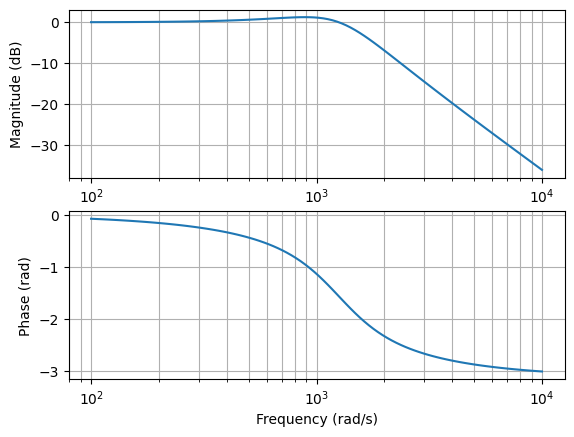

In [7]:
#### TASK 4D ####
num = [alpha**2]
den = [1, alpha, alpha**2]
H = signal.TransferFunction(num, den)

w, mag, phase = H.bode()
phase_rad = (phase * np.pi) / 180

print("Max magnitude (dB):", np.max(mag))

#### Task 4d) ####
fig, ax4 = plt.subplots(2, 1)
ax4[0].semilogx(w, mag)
ax4[0].set_ylabel("Magnitude (dB)")
ax4[0].grid(True, which= 'both')

ax4[1].semilogx(w, phase_rad)
ax4[1].set_ylabel("Phase (rad)")
ax4[1].set_xlabel("Frequency (rad/s)")
ax4[1].grid(True, which= 'both')

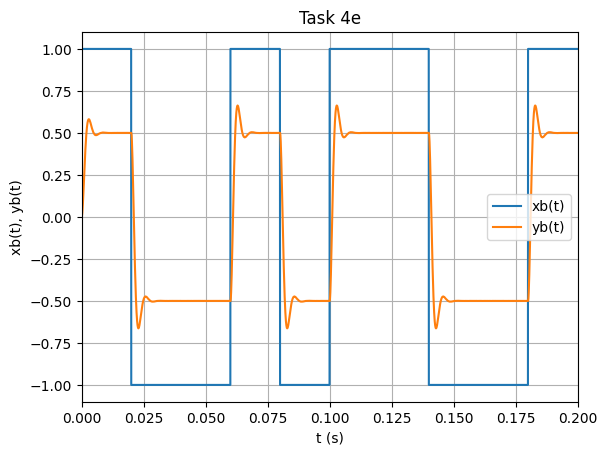

In [8]:
#### TASK 4E ####
__, yb, __ = signal.lsim(H, yd, t)

plt.figure()
plt.title("Task 4e")
plt.plot(t, xb, label="xb(t)")
plt.plot(t, yb, label="yb(t)")
plt.legend()
plt.xlabel("t (s)")
plt.ylabel("xb(t), yb(t)")
plt.xlim(0, t1)
plt.grid()

In [9]:
#### TASK 4F ####
br = wcs.decode_baseband_signal(yd, Tb)
print(f"Received bits: {br}")
print(f"Bits: {data}")

Received bits: [0 1 0 1 1 0 0 1 1 0]
Bits: [0, 1, 0, 1, 1, 0, 0, 1, 1, 0]
